In [37]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr

In [38]:
def plot_tmmx():
  # Open the NetCDF file
    file_path = './dotnc/tmmx.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)

    # Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    # req_thing = 'precipitation_amount'

    req_thing = 'air_temperature'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_celsius=t_max-273.15
    # Select a specific time step (for example, the first time step)
    t_max_slice= t_max_celsius[91, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    plt.figure(figsize=(12, 8))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='coolwarm', shading='flat')


    # Add colorbar
    plt.colorbar(mesh, label='Temperature (°C)')

    # Add title
    plt.title('Maximum Near-Surface Air Temperature over the USA')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [39]:
def plot_tmmn():
  # Open the NetCDF file
    file_path = './dotnc/tmmn.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)

    # Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    # req_thing = 'precipitation_amount'

    req_thing = 'air_temperature'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_celsius=t_max-273.15
    # Select a specific time step (for example, the first time step)
    t_max_slice= t_max_celsius[91, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    plt.figure(figsize=(12, 8))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='coolwarm', shading='flat')


    # Add colorbar
    plt.colorbar(mesh, label='Temperature (°C)')

    # Add title
    plt.title('Minimum Near-Surface Air Temperature over the USA')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

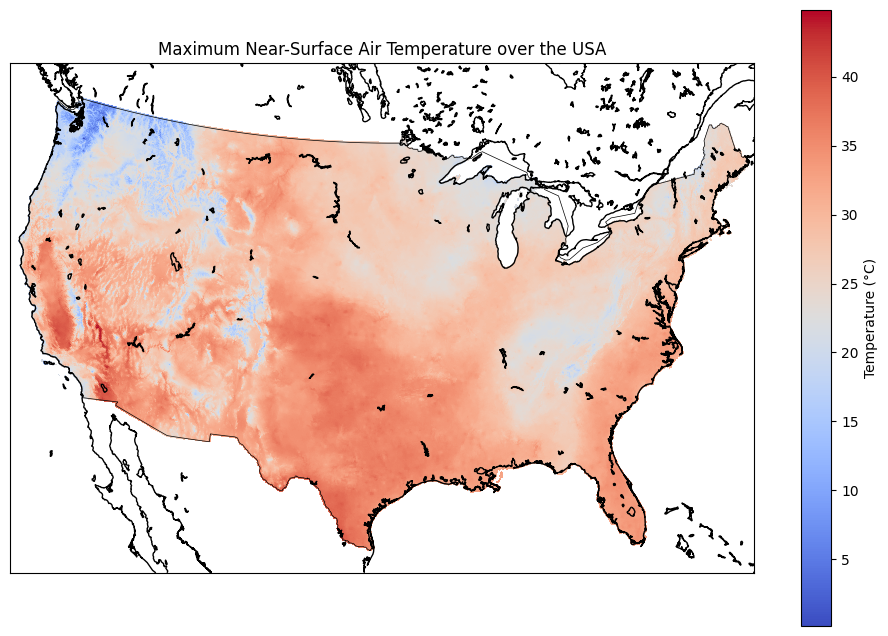

In [40]:
plot_tmmx()


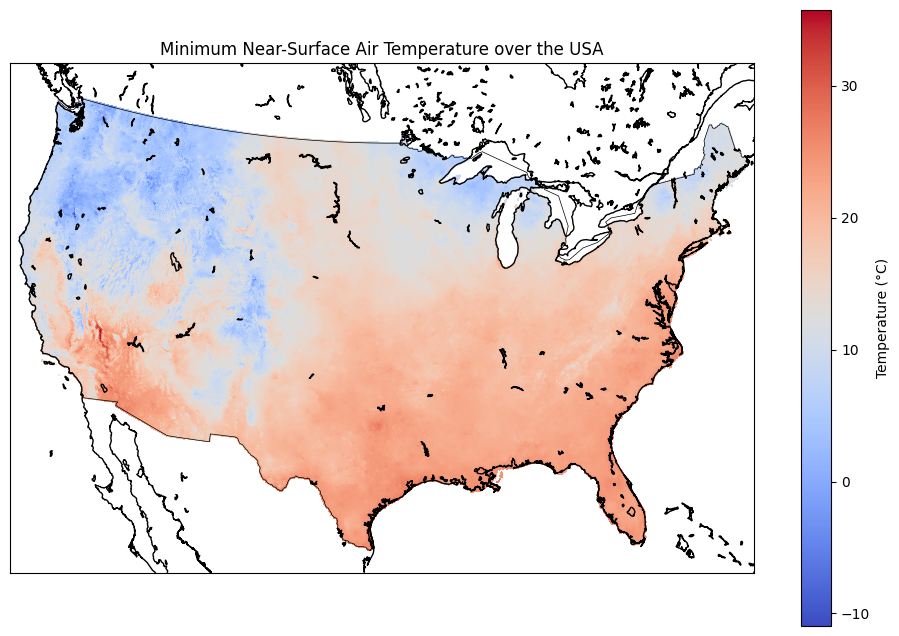

In [41]:
plot_tmmn()